In [42]:
import pickle

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from tqdm import tqdm

In [43]:
import warnings
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", RuntimeWarning)

In [44]:
IN_DIR = "D:\\result\\20221028\\"
OUT_DIR = "D:\\result\\20221028\\"
sub_dir_list = [
    "dual_1\\1\\",
    "dual_1\\2\\",
    "dual_1\\3\\",
    "dual_1\\4\\",
    "dual_1\\5\\",
    "dual_1\\6\\",
]

In [45]:
ptv_result = np.zeros((1, 6))

In [46]:
for d in range(0, 1):
    for i in tqdm(range(0, 10900, 10)):
        try:
            tmp = np.loadtxt(OUT_DIR + "ptv\\" + sub_dir_list[d] + f"pp_{i}.csv", delimiter=',', skiprows=1)
        except StopIteration:
            tmp = None
        except OSError:
            tmp = None

        if tmp is None:
            pass
        elif tmp.ndim == 1:
            if len(tmp) > 0:
                tmp = tmp[np.newaxis, :]
            else:
                tmp = None
        elif tmp.ndim == 2:
            pass
        else:
            tmp = None

        if tmp is None:
            pass
        else:
            ptv_result = np.vstack([ptv_result, tmp])

100%|██████████| 1090/1090 [00:00<00:00, 1737.67it/s]


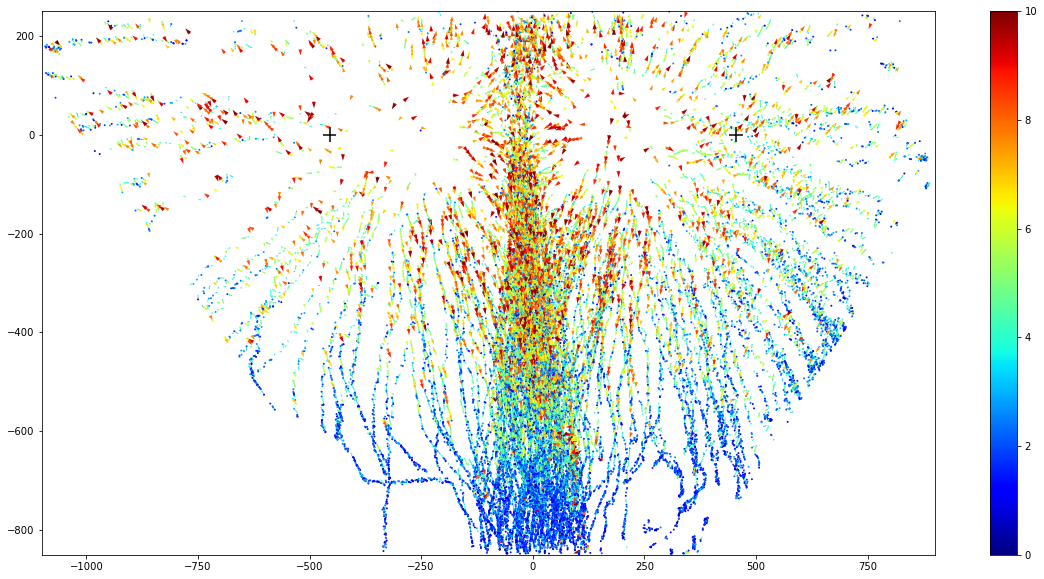

In [47]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.xlim(-1100, 900)
plt.ylim(-850, 250)
ax.hlines(0, -440, -470, color='k')
ax.vlines(-455, -15, 15, color='k')
ax.hlines(0, 440, 470, color='k')
ax.vlines(455, -15, 15, color='k')

c = ax.quiver(ptv_result[:, 0]-1100, -ptv_result[:, 1]+250, ptv_result[:, 2], -ptv_result[:, 3], np.sqrt(ptv_result[:, 2]**2 + ptv_result[:, 3]**2), cmap="jet")

fig.colorbar(c)
plt.show()

In [48]:
ptv_result = pd.DataFrame(ptv_result, columns=['x', 'y', 'dx', 'dy', 'p0', 'p1'])
for row in tqdm(ptv_result.index):
    if (ptv_result.loc[row] == 0).all():
        ptv_result.drop(row, axis=0, inplace=True)

100%|██████████| 34312/34312 [00:06<00:00, 5179.41it/s]


In [49]:
with open(f'ptv_result_A_test.pickle', mode='wb') as fp:
    pickle.dump(ptv_result, fp)